# Figure 3. The ESCRT-III and autophagosome formation pathway. 

In [15]:
# Packages used within the code

import boolean2 as b2             # boolean2 is used to produced the model
import matplotlib.pyplot as plt   # matplotlib is used to produce the grpahs of the model
import re                         # re was used during personal code checks of the model but currently is not used.

In [29]:
from model_definition import model_definition, model_initialisation, model_rules, define_model

from model_definition import initialise_random


In [30]:
print define_model(model_initialisation, model_rules)



# This first section is defining the inital state of every node in the system beggining with complexs and miscellaneous nodes

ENDOCYTOSIS_VESICLE_STAGE_1=False
ENDOCYTOSIS_VESICLE_STAGE_2=False
ENDOCYTOSIS_VESICLE_STAGE_3=False
ENDOCYTOSIS_VESICLE_STAGE_4=False
ENDOCYTOSIS_VESICLE_STAGE_5=False
ENDOCYTOSIS_VESICLE_STAGE_6=False
CLASP_PROTEINS_CARGO=False
ARP2_3_COMPLEX=False
AP-2_COMPLEX_CARGO=False
CLASP_PROTEINS=True
GOLGI-ASSOCIATED_VESICLE_DESTINED_CARGO=False
GOLGI_VESICLE_STAGE_1=False
GOLGI_VESICLE_STAGE_2=False
GOLGI_VESICLE_STAGE_3 =False
CLAT_AP1_CLVS_PI_3_5_P2=False
AP1G2_HGS_CHMP2A=False
AP-1_COMPLEX=False
HSC70_AUXILLIN_COMPLEX=False
LYSOSOME_DESTINED_CARGO=False
LYSOSOME_VESICLE_STAGE_1=False
LYSOSOME_VESICLE_STAGE_2=False
LYSOSOME_VESICLE_STAGE_3=False
WASPS_COMPLEX_STAGE_1=False
WASPS_COMPLEX_STAGE_2=False
MOTHER_FILAMENT_BRANCHING_COMPLEX=True
FC_GAMMA_PHAGOCYTOSIS=False
G-ACTIN=False
ESCRT-0=False
ESCRT-I=False
ESCRT-II=False
ESCRT-III=False
ESCRT-0_CARGO_COMPLEX=F

In [31]:
pathway_terms= """
ESXH
ESXG

HSG
STAM1
STAM2
MVB12A
VPS28
VPS37B

ESCRT-0

ESCRT-0_CARGO_COMPLEX

TSG101
VPS37A
VPS37C
VPS37D

ESCRT-I

ESCRT-I_CARGO_COMPLEX

SNF8
VPS25
VPS36

ESCRT-II

ESCRT-II_CARGO_COMPLEX

UBIQUINATED_CARGO

CHMP2A
CHMP3
CHMP48
ENSG00000249884

CHMP2B
CHMP4A
CHMP4C
VCP

ESCRT-III

ESCRT-III_CARGO_COMPLEX

VPS4A
VPS4B
VTA1

RV2074
UBXN6
NSFL1C

SVIP
ASPSCR1

GABARAP
GABARAPL2
MAP1LC3

GABARAPL1
MAP1LC3

LC3_PROTEINS

RUBCN

PIK3C3
BECLIN_1_COMPLEX

PHAGOPHORE

Autophagosome_formation
"""

In [19]:
pathway_terms = sorted(list(dict.fromkeys(pathway_terms.split("\n"))))[1:]

In [20]:
pathway_items = [] # drop any rules that don't contain a pathway relevant node
for item in model_rules.split("\n"):
    if item.startswith('# '):
#         print '\n' + item + '\n'
        pathway_items.append('\n' + item + '\n')
        continue 
    for term in pathway_terms: 
        if term in item:
#             print item
            pathway_items.append(item)
            break
    continue

In [21]:
model_rules_pathway = "\n".join(pathway_items)

In [22]:
print model_rules_pathway


# First are the rules for tb proteins ,NOTE 'offswitch' is added to the rules to allow the node to be turned off

ESXH*=MTB 
ESXG*=MTB 
RV2074*=MTB 

# Next are the rules for host COMPLEXES , functions and proteins.  Rules related to each other are grouped together

CLASP_PROTEINS_CARGO*=AP-2_COMPLEX and VAMP7 and SYT11 and CLTC and VAMP8 and ADRB2 and HGS and STAM and STAM2
AP1G2_HGS_CHMP2A*=HGS and CHMP2A and AP1G2
ESCRT-0*=STAM and STAM2 and HGS
ESCRT-I*=MVB12A and TSG101 and VPS28 and VPS37A and VPS37B and VPS37C and VPS37D
ESCRT-II*=SNF8 and VPS25 and VPS36
ESCRT-III*=CHMP2A and CHMP2B and CHMP3 and CHMP4A and CHMP4B and CHMP4C and ENSG00000249884 and VCP
ESCRT-0_CARGO_COMPLEX*=ESCRT-0 and UBIQUINATED_CARGO and not ESCRT-I_CARGO_COMPLEX
ESCRT-I_CARGO_COMPLEX*=ESCRT-I and ESCRT-0_CARGO_COMPLEX and not ESCRT-II_CARGO_COMPLEX
ESCRT-II_CARGO_COMPLEX*=ESCRT-II and ESCRT-I_CARGO_COMPLEX and not ESCRT-III_CARGO_COMPLEX
ESCRT-III_CARGO_COMPLEX*=ESCRT-III and ESCRT-II_CARGO_COMPLEX and no

In [23]:
# model helper functions

def run_model(definition, steps=15, mode='sync'): # run model under settings
    model = b2.Model(text=definition, mode=mode)
    model.initialize()
    model.iterate(steps=steps)
    return model
    
def print_model(model): # print node states
    for node in model.data:
        print node, model.data[node]

def plot_model(model, w=10, h=32): # plot node states 
    data = []
    labels = sorted(model.data.keys()) # nodes sorted alphabetically
    for label in labels:
        data.append(model.data[label])
        
    # figure
    plt.yticks(range(0, len(labels)), labels)
    plt.imshow(data ,cmap=plt.cm.get_cmap('RdYlGn'), interpolation='none')
    plt.gcf().set_size_inches(w, h)
    
def plot_nodes(model, nodes, w=10, h=32): # plot node states 
    data = []
    labels = sorted(nodes) # nodes sorted alphabetically
    for label in labels:
        data.append(model.data[label])
        
    # figure
    plt.yticks(range(0, len(labels)), labels)
    plt.imshow(data ,cmap=plt.cm.get_cmap('RdYlGn'), interpolation='none')
    plt.gcf().set_size_inches(w, h)

In [28]:
# test helpers on original model
model = run_model(model_definition)
# plot_model(model)

In [25]:
pathway_activation_nodes = ['RAB7COMPLEX', 
                            'Autophagosome_formation', 
                            'LYSOSOME_VESICLE_STAGE_3',
                            'FC_GAMMA_PHAGOCYTOSIS',
                            'ESCRT-III'
                           ]

# plot_nodes(model, pathway_activation_nodes)

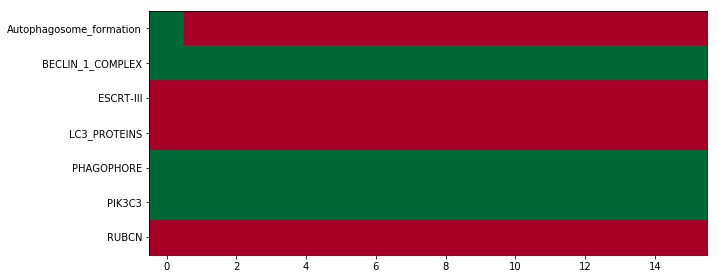

In [119]:
# run pathway model
model_initialisation = initialise_random(model_initialisation) 
model_definition_pathway = define_model(model_initialisation, model_rules_pathway)
model = run_model(model_definition_pathway)
# plot_model(model)
plot_nodes(model, ['Autophagosome_formation','ESCRT-III', 'LC3_PROTEINS', 'PHAGOPHORE', 'RUBCN', 'PIK3C3', 'BECLIN_1_COMPLEX' ])



In [115]:
print model_definition_pathway

# initialise nodes
CARGO=Random
ACTG1=Random
WLS=Random
RUBCN=Random
CHMP2B=Random
AKT1=Random
RAB7GTP=Random
CHMP2A=Random
AP-2_COMPLEX=Random
TXNDC5=Random
RAB5COMPLEX=Random
AUTOPHAGY_SUBSTRATES=Random
ESCRT-0_CARGO_COMPLEX=Random
ESXG=Random
ESXH=Random
RAB7COMPLEX=Random
GABARAP=Random
NSFL1C=Random
CLASP_PROTEINS=Random
RAB7GDP=Random
EXOCYST_PATH_STAGE_2=Random
NDKA=Random
CHM=Random
BECLIN_1_COMPLEX=Random
VPS26A=Random
PIK3C3=Random
MAP1LC3C=Random
ESCRT-II_CARGO_COMPLEX=Random
KIF25=Random
ARPC1A=Random
VPS26B=Random
AKT2=Random
CLSV2=Random
ACTB=Random
SNX3=Random
VPS4B=Random
SNX6=Random
SNX5=Random
CLTC=Random
DNM2=Random
STAM=Random
HIP1R=Random
VPS37D=Random
VPS37C=Random
VPS37B=Random
VPS37A=Random
RAB1_COMPLEX_STAGE_4A=Random
ARPC3=Random
SYT11=Random
GOLGI_TO_ER_CARGO=Random
UBXN2A=Random
MAP1LC3A=Random
UBXN6=Random
MAP1LC3B=Random
VTA1=Random
KIF6=Random
ARPC2=Random
ARPC5=Random
ARPC4=Random
offswitch=Random
RAB5GTP=Random
ESCRT-III=Random
HSPA8_BOUND_AUTOPHAGIC_SU